# setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib as mpl


In [2]:
ibge = gpd.read_file(r'Data\IBGE\BiomasBrasil.shp')
shp_amz = ibge[ibge.biomas == 'AMAZÔNIA']
shp_pan = gpd.read_file(r'Data\amazon\panamz.geojson')
gdf_amz = gpd.read_file(r'Data\amazon\gdf_amz_metrics.geojson')

In [3]:
cru = xr.open_dataset(r'Data\Datasets\clean\cru.nc')
chirps = xr.open_dataset(r'Data\Datasets\clean\chirps.nc')
era = xr.open_dataset(r'Data\Datasets\clean\era.nc')
gpcc = xr.open_dataset(r'Data\Datasets\clean\gpcc.nc')
xavier = xr.open_dataset(r'Data\Datasets\clean\xavier.nc')
terra = xr.open_dataset(r'Data\Datasets\clean\terraclimate.nc')
worldclim = xr.open_dataset(r'Data\Datasets\clean\worldclim.nc')


# map

In [6]:
#take mean for each dataset and plot in each ax
cru_clim = cru.groupby('time.month').mean(dim='time').sum(dim='month')
chirps_clim = chirps.groupby('time.month').mean(dim='time').sum(dim='month')
era_clim = era.groupby('time.month').mean(dim='time').sum(dim='month')
gpcc_clim = gpcc.groupby('time.month').mean(dim='time').sum(dim='month')
xavier_clim = xavier.groupby('time.month').mean(dim='time').sum(dim='month')
terra_clim = terra.groupby('time.month').mean(dim='time').sum(dim='month')
worldclim_clim = worldclim.groupby('time.month').mean(dim='time').sum(dim='month')

In [7]:
datasets = [cru_clim, chirps_clim, era_clim, gpcc_clim, terra_clim,worldclim_clim,xavier_clim]
datasets_names = ['CRU', 'CHIRPS', 'ERA5', 'GPCC', 'TERRACLIMATE','WORLDCLIM','XAVIER']
vmin = 500
vmax = 3500
proj = ccrs.Mercator()


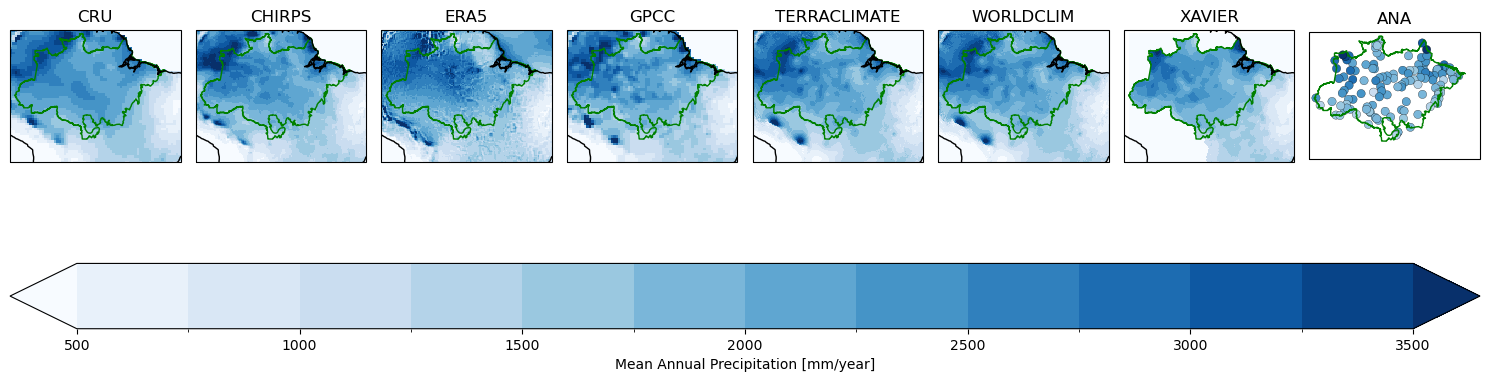

In [8]:
# Create a figure and a gridspec layout
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, len(datasets)+1, height_ratios=[0.9, 0.1])

# Loop through the datasets and plot them
for i, ds in enumerate(datasets):
    # Create an axis for the subplot
    ax = plt.subplot(gs[0, i], projection = proj)

    # Plot the data
    im = ds.pr.plot(ax=ax, cmap='Blues', vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels= 13)
    ax.add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
    # Add a title for each subplot
    ax.set_title(datasets_names[i])
    # Remove x and y labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_extent([-75, -40, -20, 6])

    ax.coastlines()

ax_stat = plt.subplot(gs[0, -1], projection = proj)
gdf_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, column='MAP', cmap='Blues',   scheme="User_Defined", 
                classification_kwds=dict(bins=np.linspace(500, 3500, 13)), linewidth=0.2, edgecolor='black')
ax_stat.set_title('ANA')   
shp_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, facecolor='none', edgecolor='green', linewidth=1)
ax_stat.set_xlim(-75, -40)
ax_stat.set_ylim(-20, 6)
ax_stat.coastlines(transform=ccrs.PlateCarree())

#plot amz
# Add a colorbar
cax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Mean Annual Precipitation [mm/year]')
plt.tight_layout()

# dsl

In [9]:
cru_clim['dsl'] = (cru.pr < 100).groupby('time.year').sum(dim='time').mean('year')
chirps_clim['dsl'] = (chirps.pr < 100).groupby('time.year').sum(dim='time').mean('year')
era_clim['dsl'] = (era.pr < 100).groupby('time.year').sum(dim='time').mean('year')
gpcc_clim['dsl'] = (gpcc.pr < 100).groupby('time.year').sum(dim='time').mean('year')
xavier_clim['dsl'] = (xavier.pr < 100).groupby('time.year').sum(dim='time').mean('year')
terra_clim['dsl'] = (terra.pr < 100).groupby('time.year').sum(dim='time').mean('year')
worldclim_clim['dsl'] = (worldclim.pr < 100).groupby('time.year').sum(dim='time').mean('year')


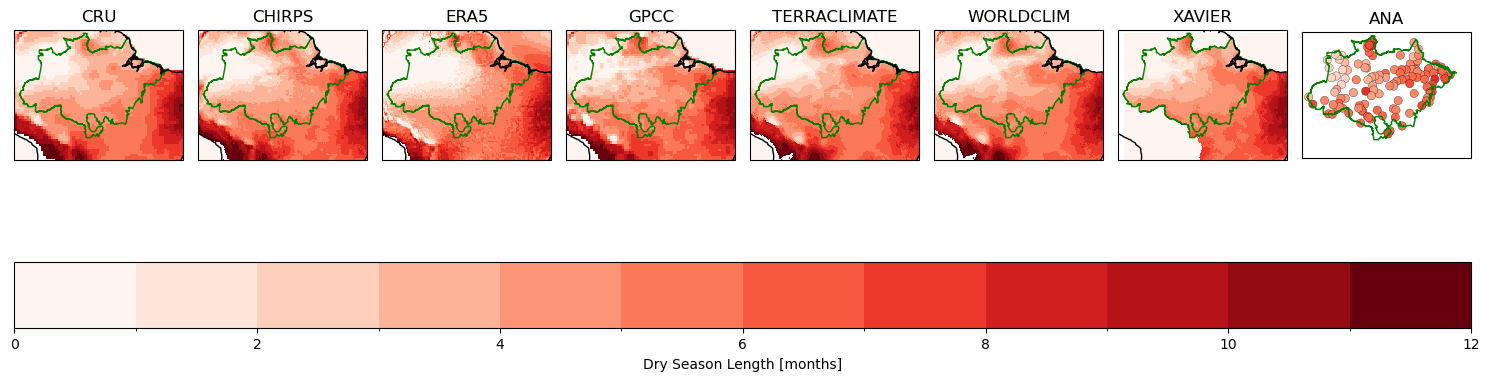

In [10]:
# Create a figure and a gridspec layout
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, len(datasets)+1, height_ratios=[0.9, 0.1])

# Loop through the datasets and plot them
for i, ds in enumerate(datasets):
    # Create an axis for the subplot
    ax = plt.subplot(gs[0, i], projection = proj)

    # Plot the data
    im = ds.dsl.plot(ax=ax, cmap='Reds', vmin=0, vmax=12, add_colorbar=False, transform=ccrs.PlateCarree(), levels=13)
    ax.add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
    # Add a title for each subplot
    ax.set_title(datasets_names[i])
    # Remove x and y labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_extent([-75, -40, -20, 6])

    ax.coastlines()
    #plot amz

ax_stat = plt.subplot(gs[0, -1], projection = proj)
gdf_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, column='DSL', cmap='Reds',   scheme="User_Defined", 
                classification_kwds=dict(bins=np.linspace(0, 12, 13)), linewidth=0.2, edgecolor='black')
ax_stat.set_title('ANA')   
shp_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, facecolor='none', edgecolor='green', linewidth=1)
ax_stat.set_xlim(-75, -40)
ax_stat.set_ylim(-20, 6)
ax_stat.coastlines(transform=ccrs.PlateCarree())

# Add a colorbar
cax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Dry Season Length [months]')
plt.tight_layout()

# entropy

In [11]:
from scipy.stats import entropy

def yearly_ratio(x):
    return x / (x.mean(dim='time')*12)

def entropy_models(ds):
    
    ds['ratio'] = ds.groupby('time.year').apply(yearly_ratio).pr
    uniform = np.zeros((12, ds.pr.shape[1], ds.pr.shape[2]))
    uniform[:] = 1/12
    ds['entropy'] = ds.ratio.groupby('time.year').reduce(entropy, qk = uniform, base=2, dim='time')
    return ds[['entropy']]

In [12]:
cru_clim['entropy'] = entropy_models(cru).mean('year').entropy
chirps_clim['entropy'] = entropy_models(chirps).mean('year').entropy
era_clim['entropy'] = entropy_models(era).mean('year').entropy
gpcc_clim['entropy'] = entropy_models(gpcc).mean('year').entropy
xavier_clim['entropy'] = entropy_models(xavier).mean('year').entropy
terra_clim['entropy'] = entropy_models(terra).mean('year').entropy
worldclim_clim['entropy'] = entropy_models(worldclim).mean('year').entropy


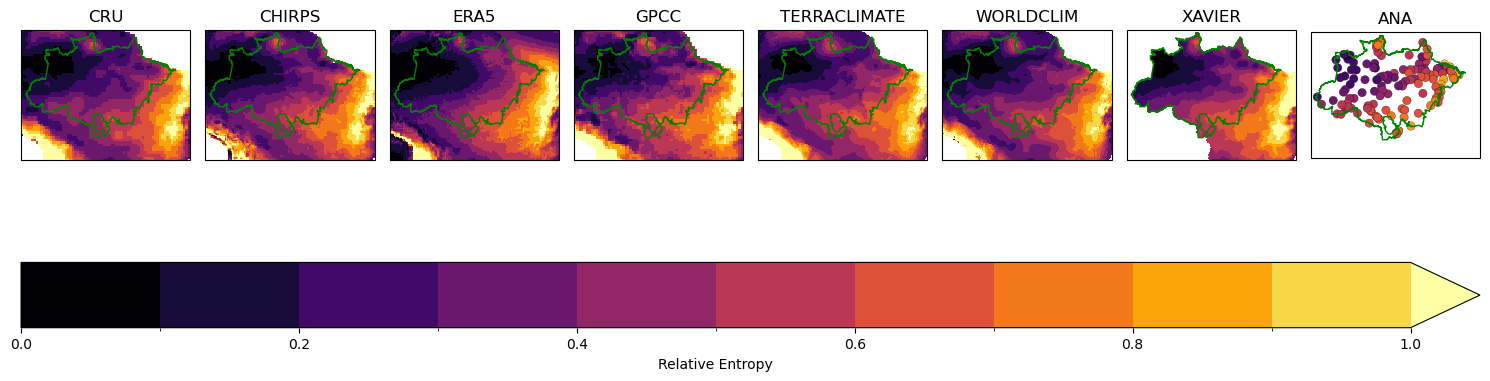

In [13]:
# Create a figure and a gridspec layout
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, len(datasets)+1, height_ratios=[0.9, 0.1])

# Loop through the datasets and plot them
for i, ds in enumerate(datasets):
    # Create an axis for the subplot
    ax = plt.subplot(gs[0, i], projection = proj)

    # Plot the data
    im = ds.entropy.plot(ax=ax, cmap='inferno', vmin=0, vmax=1, add_colorbar=False, transform=ccrs.PlateCarree(), levels=11)
    ax.add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
    # Add a title for each subplot
    ax.set_title(datasets_names[i])
    # Remove x and y labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_extent([-75, -40, -20, 6])

    #ax.coastlines()
    #plot amz


ax_stat = plt.subplot(gs[0, -1], projection = proj)
gdf_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, column='Entropy', cmap='inferno',   scheme="User_Defined", 
                classification_kwds=dict(bins=np.linspace(0, 1, 11)), linewidth=0.2, edgecolor='black')
ax_stat.set_title('ANA')   
shp_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, facecolor='none', edgecolor='green', linewidth=1)
ax_stat.set_xlim(-75, -40)
ax_stat.set_ylim(-20, 6)
ax_stat.coastlines(transform=ccrs.PlateCarree())

# Add a colorbar
cax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Relative Entropy')
plt.tight_layout()

# interpolar


In [101]:
#interpolate all datasets to the same grid of cru
cru_int = cru_clim
chirps_int = chirps_clim.interp_like(cru_int)
era_int = era_clim.interp_like(cru_int)
gpcc_int = gpcc_clim.interp_like(cru_int)
terra_int = terra_clim.interp_like(cru_int)
worldclim_int = worldclim_clim.interp_like(cru_int)
xavier_int = xavier_clim.interp_like(cru_int)


NameError: name 'cru_clim' is not defined

In [15]:
datasets_int = [cru_int, chirps_int, era_int, gpcc_int, terra_int,worldclim_int,xavier_int]
datasets_names = ['CRU', 'CHIRPS', 'ERA5', 'GPCC', 'TERRACLIMATE','WORLDCLIM','XAVIER']
vmin = 500
vmax = 3500
proj = ccrs.Mercator()

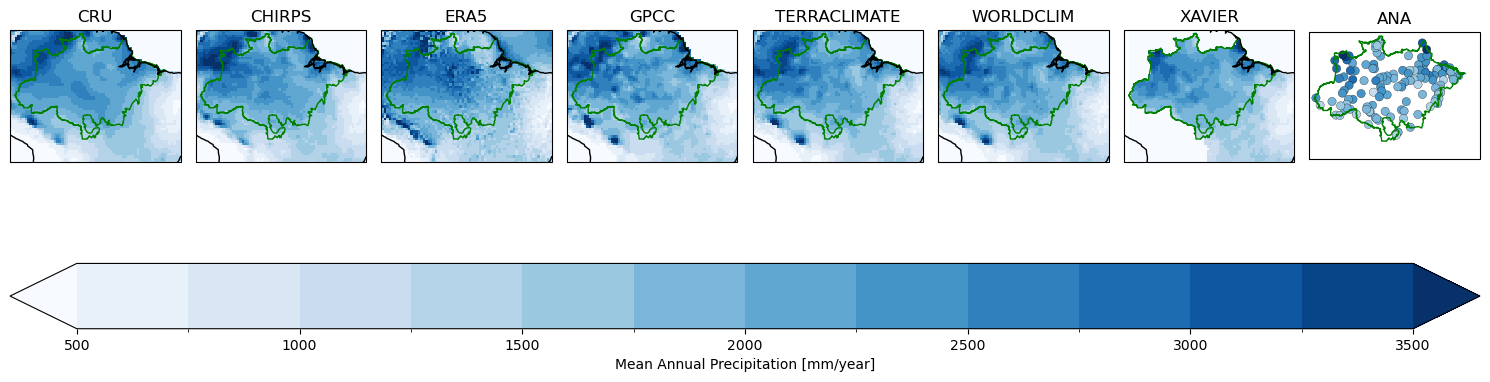

In [16]:
# Create a figure and a gridspec layout
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, len(datasets_int)+1, height_ratios=[0.9, 0.1])

# Loop through the datasets and plot them
for i, ds in enumerate(datasets_int):
    # Create an axis for the subplot
    ax = plt.subplot(gs[0, i], projection = proj)

    # Plot the data
    im = ds.pr.plot(ax=ax, cmap='Blues', vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels= 13)
    ax.add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
    # Add a title for each subplot
    ax.set_title(datasets_names[i])
    # Remove x and y labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_extent([-75, -40, -20, 6])

    ax.coastlines()

ax_stat = plt.subplot(gs[0, -1], projection = proj)
gdf_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, column='MAP', cmap='Blues',   scheme="User_Defined", 
                classification_kwds=dict(bins=np.linspace(500, 3500, 13)), linewidth=0.2, edgecolor='black')
ax_stat.set_title('ANA')   
shp_amz.to_crs(ccrs.PlateCarree()).plot(ax=ax_stat, facecolor='none', edgecolor='green', linewidth=1)
ax_stat.set_xlim(-75, -40)
ax_stat.set_ylim(-20, 6)
ax_stat.coastlines(transform=ccrs.PlateCarree())

#plot amz
# Add a colorbar
cax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Mean Annual Precipitation [mm/year]')
plt.tight_layout()

In [17]:
vmin_int = -500
vmax_int = 500
cmap_int = mpl.cm.RdBu
proj = ccrs.Mercator()
bounds_int = np.linspace(vmin_int,vmax_int,11)
norm_int = mpl.colors.BoundaryNorm(bounds_int, cmap_int.N, extend='both')
sm_int = plt.cm.ScalarMappable(cmap=cmap_int, norm=norm_int)
# fake up the array of the scalar mappable. Urgh...
sm_int._A = []

C:\Users\luisg\AppData\Local\Temp\ipykernel_12572\3772932335.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


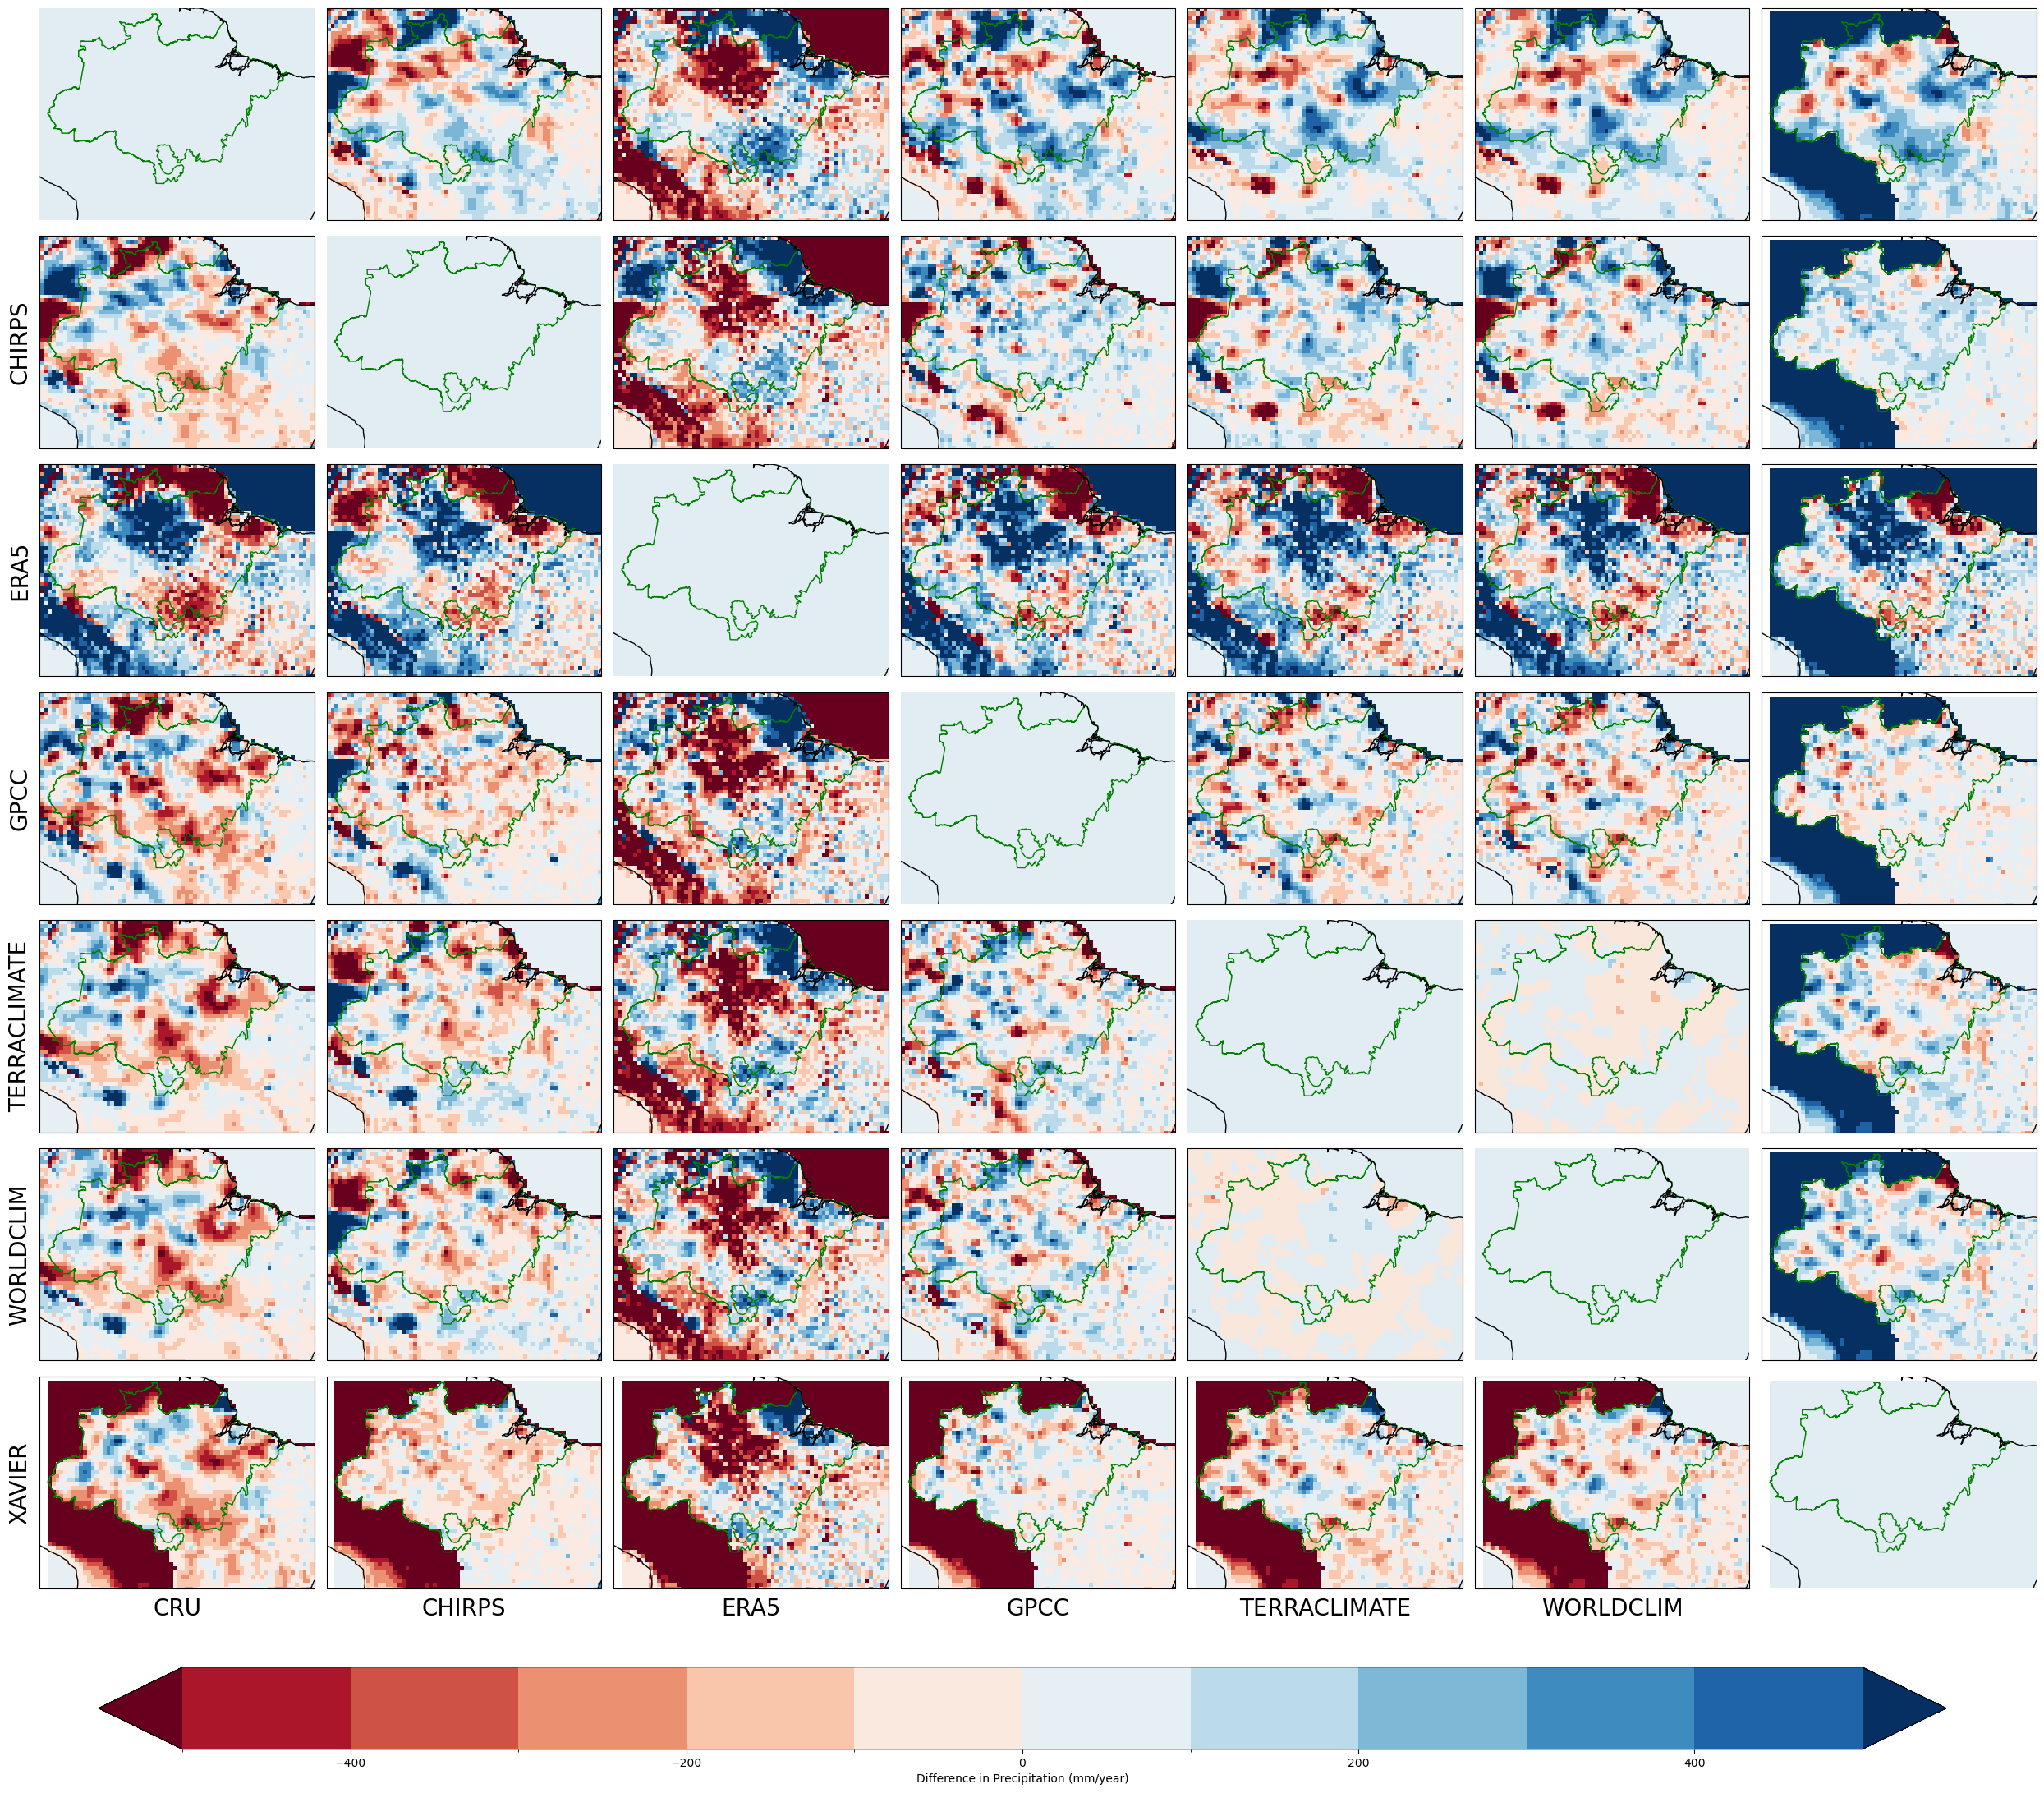

In [20]:
#plot one dataset minus the other for all pairs
fig, axes = plt.subplots(nrows=len(datasets_int), ncols=len(datasets_int), figsize=(25, 20), subplot_kw={'projection': proj})
cax = fig.add_axes([0.05, -0.07, 0.9, 0.05])

fig.colorbar(sm_int, cax=cax, orientation='horizontal', label='Difference in Precipitation (mm/year)')

for i, ds1 in enumerate(dataseats_int):
    for j, ds2 in enumerate(datasets_int):
        #plot only the lower triangle
        #if i > j:
        im = (ds1.pr - ds2.pr).plot(ax=axes[i, j], cmap='RdBu', vmin=vmin_int, vmax=vmax_int, add_colorbar=False, transform=ccrs.PlateCarree(), levels= 11)
        axes[i, j].add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        axes[i, j].set_extent([-75, -40, -20, 6])
        axes[i, j].coastlines()
        #if i == j:
        #    ds1.pr.plot(ax=axes[i, j], cmap='Blues', vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels= 13)
        #    axes[i, j].add_geometries(shp_amz.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
        #    axes[i, j].set_xticks([])
        #    axes[i, j].set_yticks([])
        #    axes[i, j].set_xlabel('')
        #    axes[i, j].set_ylabel('')
        #    axes[i, j].set_extent([-75, -40, -20, 6])
        #    axes[i, j].coastlines()
        ##else:
        ##    axes[i, j].axis('off')
        if i == j:
            axes[i, j].axis('off')

#add the names of the datasets
for i, ds in enumerate(datasets_names):
    axes[i, 0].set_ylabel(ds, fontsize=20, rotation=90)
    axes[-1, i].set_xlabel(ds, fontsize=20)

plt.tight_layout()

# fourier

In [4]:
#clip cru to amz shp
from shapely.geometry import mapping
cru_amz = cru.rio.write_crs(shp_pan.crs).rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)
worldclim_amz = worldclim.rio.write_crs(shp_pan.crs).rio.set_spatial_dims(x_dim='lon', y_dim='lat').rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)
chirps_amz = chirps.rio.write_crs(shp_pan.crs).rio.set_spatial_dims(x_dim='lon', y_dim='lat').rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)
era_amz = era.rio.write_crs(shp_pan.crs).rio.set_spatial_dims(x_dim='lon', y_dim='lat').rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)
gpcc_amz = gpcc.rio.write_crs(shp_pan.crs).rio.set_spatial_dims(x_dim='lon', y_dim='lat').rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)
terra_amz = terra.rio.write_crs(shp_pan.crs).rio.set_spatial_dims(x_dim='lon', y_dim='lat').rio.clip(shp_pan.geometry.apply(mapping), shp_pan.crs, drop=False)


In [64]:
df_cru = cru_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()
df_worldclim = worldclim_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()
df_chirps = chirps_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()
df_era = era_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()
df_gpcc = gpcc_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()
df_terra = terra_amz[['pr']].groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).to_dataframe()

In [65]:
#concat dfs with a dataset name column
df_cru['dataset'] = 'CRU'
df_worldclim['dataset'] = 'WORLDCLIM'
df_chirps['dataset'] = 'CHIRPS'
df_era['dataset'] = 'ERA5'
df_gpcc['dataset'] = 'GPCC'
df_terra['dataset'] = 'TERRACLIMATE'

df = pd.concat([df_cru, df_worldclim, df_chirps, df_era, df_gpcc, df_terra])[['pr', 'dataset']]
df = df.reset_index()
df['pr'] = df.pr * 12

In [67]:
from scipy import fftpack
#fast fourier for each dataset in df, and create a df with the results
df_fft = pd.DataFrame()
for dataset in df.dataset.unique():
    df_dataset = df[df.dataset == dataset]
    df_dataset_fft = fftpack.fft(df_dataset[df_dataset.dataset == dataset].pr.values)
    #power spectrum
    power = np.abs(df_dataset_fft)
    #sample frequencies
    sample_freq = fftpack.fftfreq(df_dataset[df_dataset.dataset == dataset].pr.size, d=1)
    #only positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]
    #save results in df_fft
    dff = pd.DataFrame({ 'power': power,'freqs': sample_freq})
    dff['dataset'] = dataset
    df_fft = pd.concat([df_fft, dff])



In [68]:
#create period column 
df_fft['period'] = 1 / df_fft.freqs
#only positive frequencies
df_fft = df_fft[df_fft.freqs > 0]

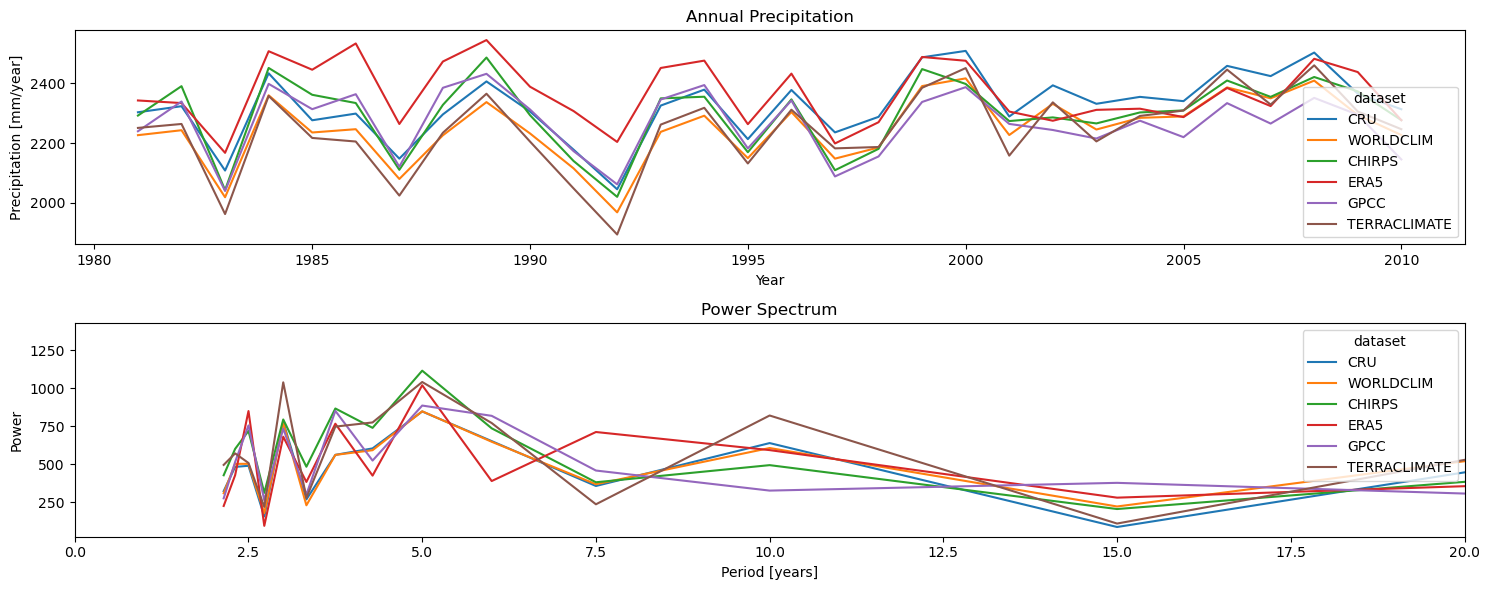

In [124]:
fig, ax = plt.subplots(2,1,figsize=(15, 6))
sns.lineplot(data=df, x='year', y='pr', hue='dataset', palette='tab10', ax=ax[0])
sns.lineplot(data=df_fft, x='period', y='power', hue='dataset', palette='tab10', ax=ax[1])
ax[1].set_xlim(0, 20)
ax[1].set_xlabel('Period [years]')
ax[1].set_ylabel('Power')
ax[1].set_title('Power Spectrum')
ax[0].set_title('Annual Precipitation')
ax[0].set_ylabel('Precipitation [mm/year]')
ax[0].set_xlabel('Year')
plt.tight_layout()


## wave test

In [28]:
df_cru.reset_index(inplace=True)

In [72]:
df_worldclim.reset_index(inplace=True)

In [73]:
signal = df_worldclim.pr.values.squeeze() #to get the scalar values
signal = signal - np.mean(signal)
time = df_worldclim.year.values.squeeze()

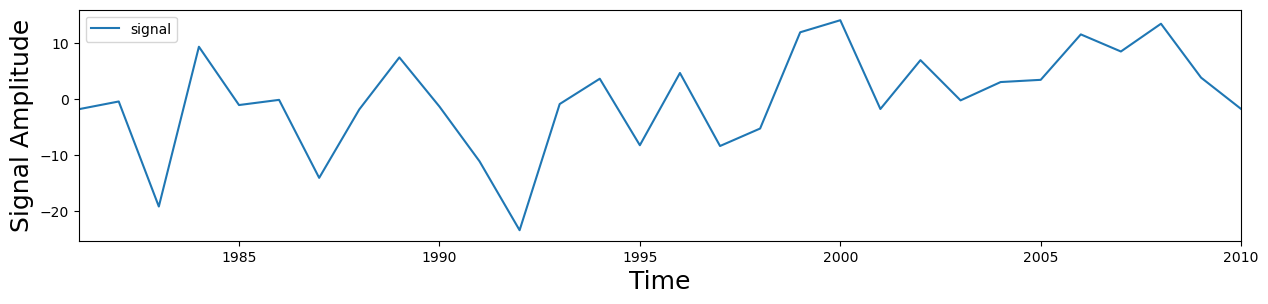

In [74]:

scales = np.arange(1, 128) #set the wavelet scales

def plot_signal(time, signal, average_over=5, figname=None):
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(time, signal, label='signal')
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    # ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
plot_signal(time, signal) #plot and label the axis

C:\Users\luisg\AppData\Local\Temp\ipykernel_19568\2877099761.py:15: RuntimeWarning: divide by zero encountered in divide
  ax[0].plot(1/f_values, fft_values, 'r-', label='Fourier Transform')
C:\Users\luisg\AppData\Local\Temp\ipykernel_19568\2877099761.py:16: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(1/f_values, fft_power, 'k--',


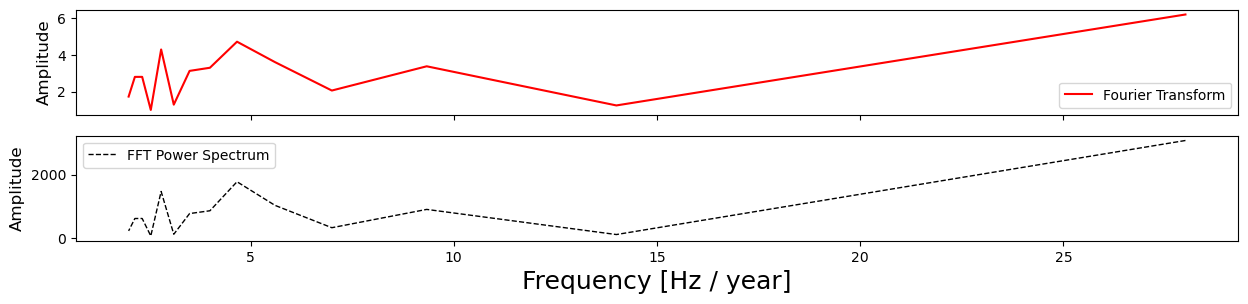

In [75]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = np.fft.fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal, figname=None):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    fig, ax = plt.subplots(2, 1, figsize=(15, 3), sharex=True)
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2  # FFT power spectrum
    ax[0].plot(1/f_values, fft_values, 'r-', label='Fourier Transform')
    ax[1].plot(1/f_values, fft_power, 'k--',
               linewidth=1, label='FFT Power Spectrum')
    
    ax[1].set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax[1].set_ylabel('Amplitude', fontsize=12)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].legend()
    ax[1].legend()

plot_fft_plus_power(time, signal)

In [76]:
import pywt


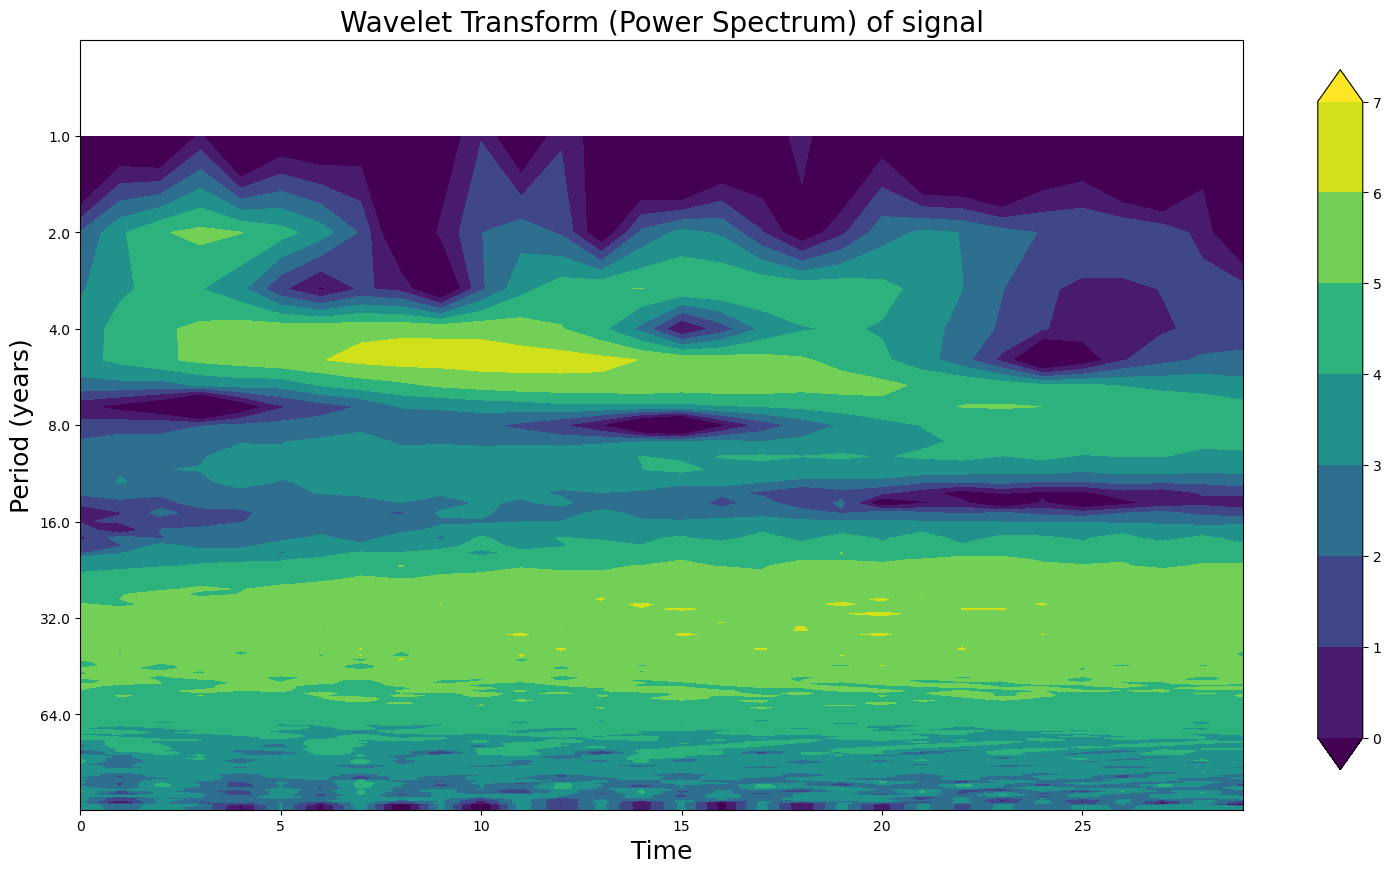

In [120]:
def plot_wavelet(time, signal, scales, waveletname='cmor1.5-1.0', cmap=plt.cm.viridis, title='Wavelet Transform (Power Spectrum) of signal', ylabel='Period (years)', xlabel='Time', figname=None):
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies

    scale0 = 1
    numlevels = 10

    levels = [scale0]
    for ll in range(1, numlevels-2):
        scale0 *= 2
        levels.append(scale0)

    contourlevels = np.log2(levels)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power),
                     contourlevels, extend='both', cmap=cmap)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())),
                          np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")


plot_wavelet(time, signal, scales)

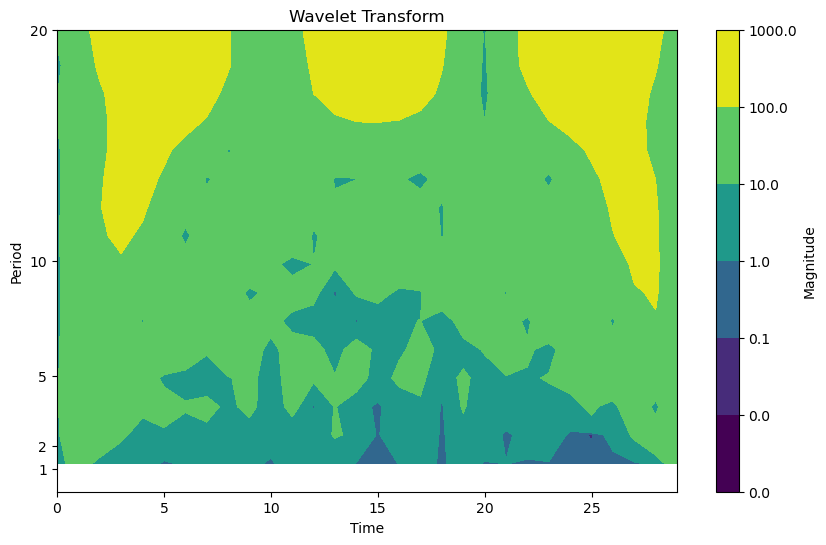

In [117]:

# Assume you have a DataFrame with a yearly time series, named 'df', with a column 'value'

# Extract the values from the DataFrame
values = df_worldclim.pr.values.squeeze()
# Perform the wavelet transform
coeffs, freqs = pywt.cwt(values, np.arange(1, 50), 'morl')

# Convert frequencies to periods
periods = 1 / freqs

# Create a time axis for the plot
time = np.arange(len(values))

# Plot the wavelet transform
fig, ax = plt.subplots(figsize=(10, 6))
norm = plt.cm.colors.LogNorm(vmin=np.abs(coeffs).min(), vmax=np.abs(coeffs).max())
im = ax.contourf(time, periods, np.abs(coeffs), cmap='viridis', norm=norm)
ax.set_xlabel('Time')
ax.set_ylabel('Period')
ax.set_title('Wavelet Transform')
ax.set_ylim([0,20])
#plot more yticks
ax.set_yticks([1, 2, 5, 10, 20])
# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Magnitude')

# Show the plot
plt.show()
